# Casimir Diagrams

Software architecture and flow diagrams

## Table of Contents

* [Install Packages](#install-packages)
* [ETL Architecture](#etl-architecture)

## Install Packages

The primary package is [diagrams](https://diagrams.mingrammer.com/), a library for drawing Graphviz diagrams with common architecture components.

In [1]:
from diagrams import Diagram, Edge, Node, Cluster
from diagrams.aws.compute import EC2, Lambda
from diagrams.onprem.network import Kong
from diagrams.aws.storage import S3
from diagrams.aws.analytics import Athena, GlueDataCatalog
from diagrams.aws.database import Dynamodb
from diagrams.custom import Custom

## ETL Architecture

> 🚧 This is a work in progress, consider the current diagram a placeholder with no actual impact on development.

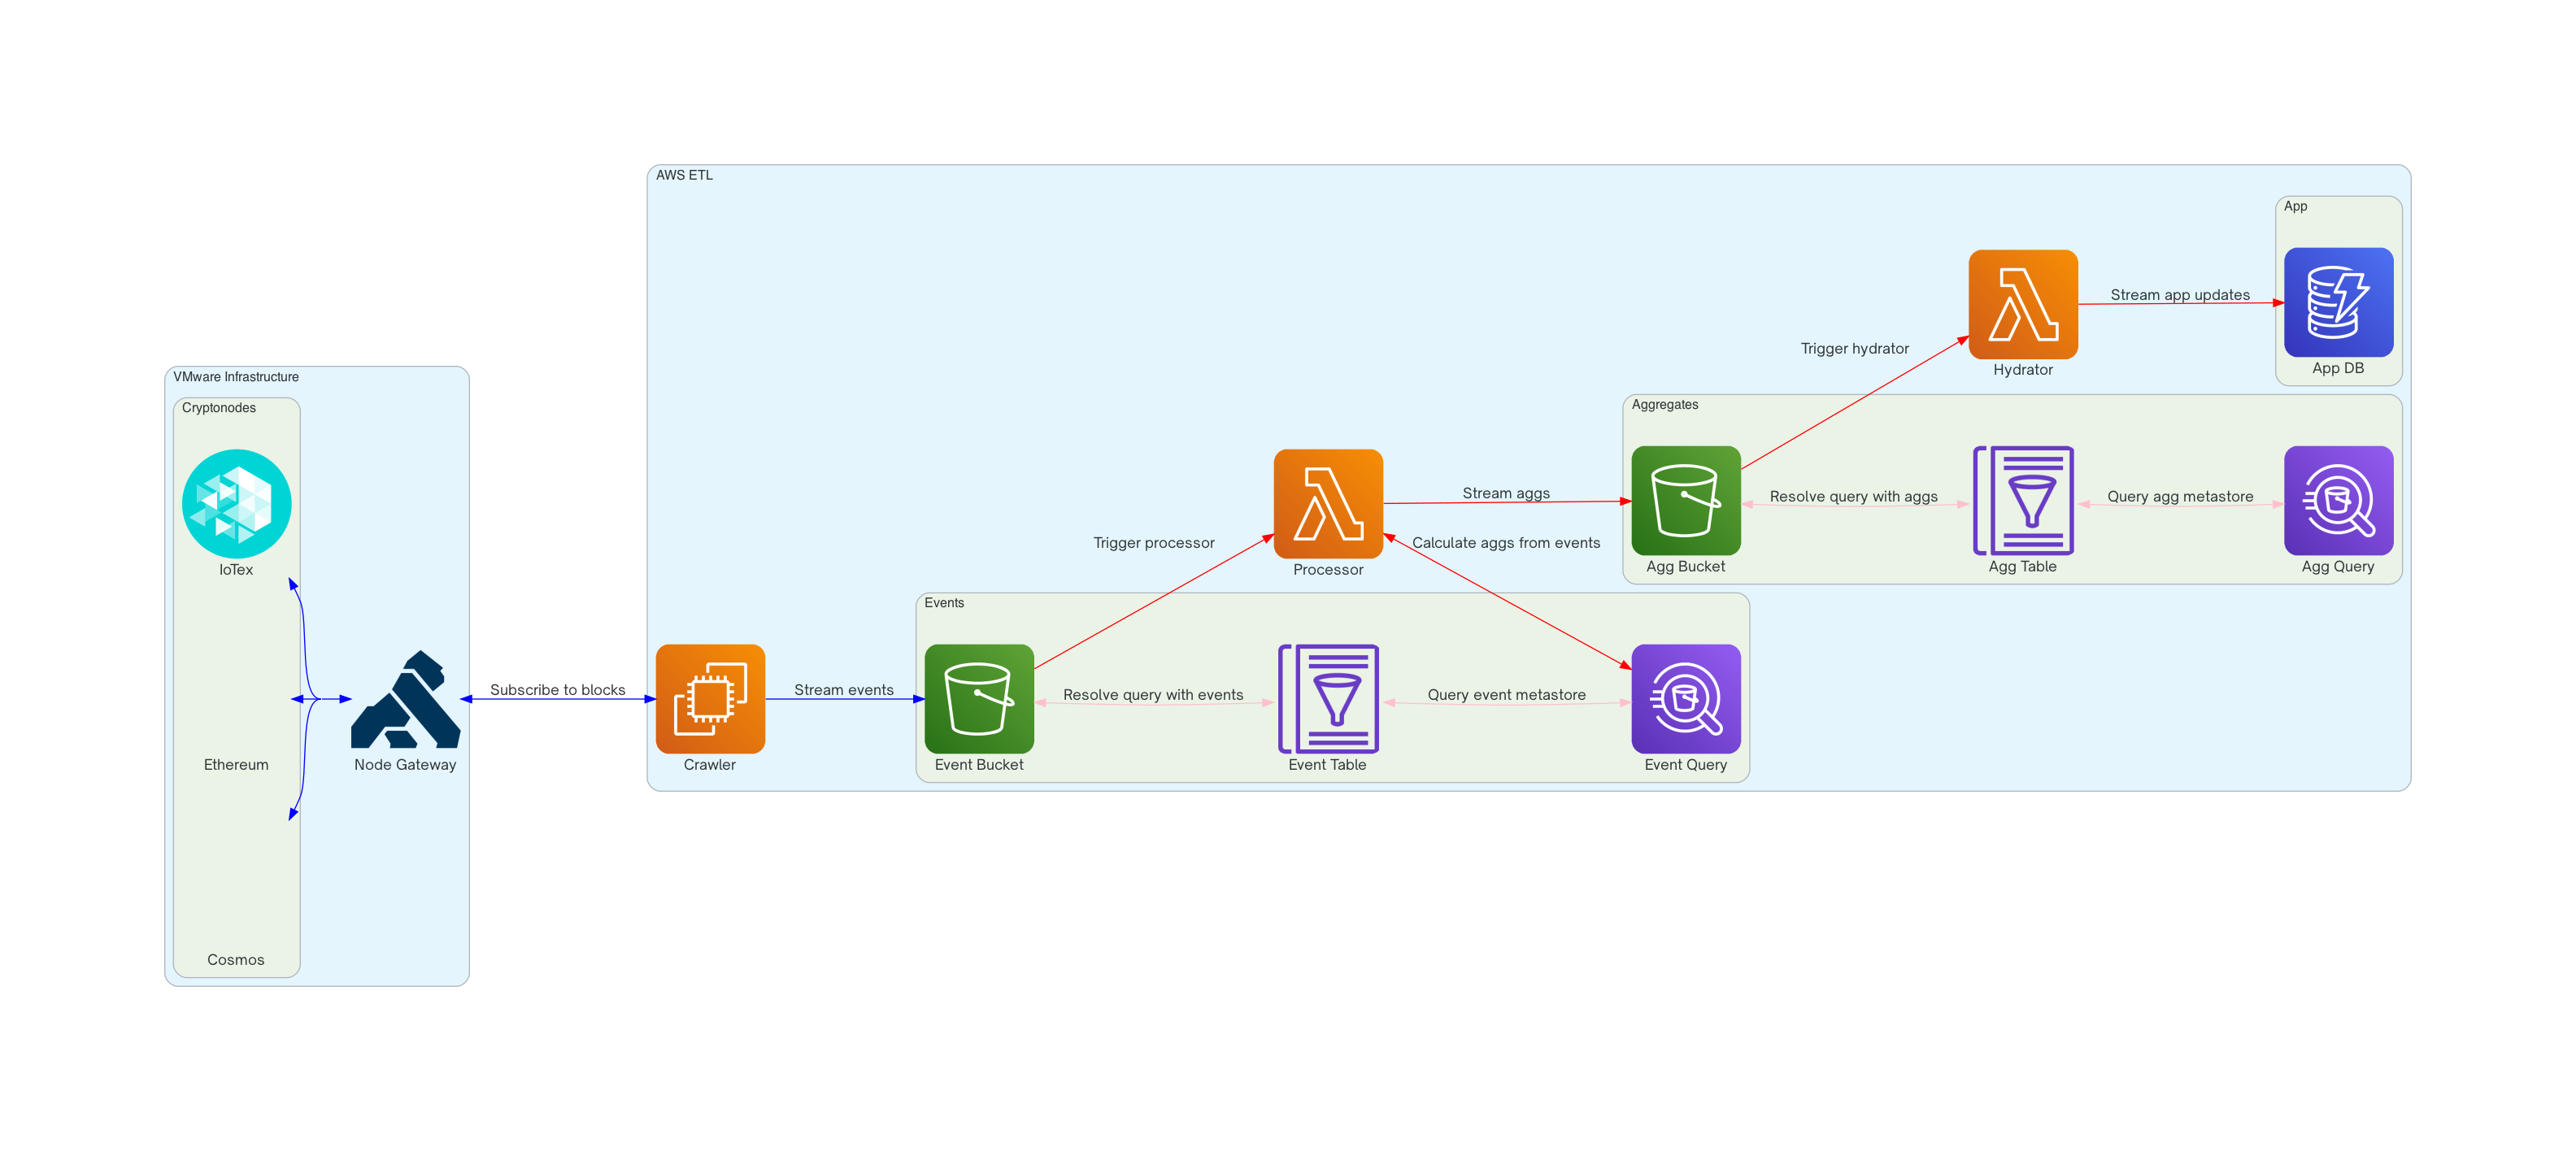

In [2]:
graph_attr = {
    "splines": "spline",
    "concentrate": "true"
}

edge_attr = {
    "fontname": "Open Sauce One"
}

node_attr = {
    "fontname": "Open Sauce One"
}

with Diagram(graph_attr=graph_attr, edge_attr=edge_attr, node_attr=node_attr, show=False, filename="content/diagrams/etl") as etl:

    with Cluster("VMware Infrastructure"):

        with Cluster("Cryptonodes"):
            cosmos = Custom("Cosmos", "content/logos/cosmos.png")
            ethereum = Custom("Ethereum", "content/logos/ethereum.png")
            iotex = Custom("IoTex", "content/logos/iotex.png")

        cryptonodes = [cosmos, ethereum, iotex]
        node_gateway = Kong("Node Gateway")
        cryptonodes >> Edge(color="blue") << node_gateway

    with Cluster("AWS ETL"):
        crawler = EC2("Crawler")
        processor = Lambda("Processor")
        hydrator = Lambda("Hydrator")

        with Cluster("Events"):
            event_bucket = S3("Event Bucket")
            event_table = GlueDataCatalog("Event Table")
            event_query = Athena("Event Query")

            event_bucket >> \
            Edge(label="Resolve query with events", color="pink", fontname="Open Sauce One") << \
            event_table >> \
            Edge(label="Query event metastore", color="pink", fontname="Open Sauce One") << \
            event_query

        with Cluster("Aggregates"):
            agg_bucket = S3("Agg Bucket")
            agg_table = GlueDataCatalog("Agg Table")
            agg_query = Athena("Agg Query")

            agg_bucket >> \
            Edge(label="Resolve query with aggs", color="pink", fontname="Open Sauce One") << \
            agg_table >> \
            Edge(label="Query agg metastore", color="pink", fontname="Open Sauce One") << \
            agg_query

        with Cluster("App"):
            app_db = Dynamodb("App DB")

        crawler >> Edge(label="Stream events", color="blue", fontname="Open Sauce One") >> event_bucket
        event_bucket >> \
        Edge(label="Trigger processor", color="red", fontname="Open Sauce One") >> \
        processor >> \
        Edge(label="Stream aggs", color="red", fontname="Open Sauce One") >> \
        agg_bucket >> \
        Edge(label="Trigger hydrator", color="red", fontname="Open Sauce One") >> \
        hydrator >> \
        Edge(label="Stream app updates", color="red", fontname="Open Sauce One") >> \
        app_db
        
        processor >> \
        Edge(label="Calculate aggs from events", color="red", fontname="Open Sauce One") << \
        event_query

        aws_etl = [crawler, event_bucket, event_table, event_query, processor, agg_bucket, agg_table, agg_query, hydrator, app_db]

    node_gateway >> Edge(label="Subscribe to blocks", color="blue", fontname="Open Sauce One") << crawler

etl